# Enunciado del problema
Una reconocida empresa dedicada a producir películas para distribuir vía streaming requiere de un mecanismo para determinar si la producción de una película generará los ingresos necesarios para garantizar un excelente margen operacional. La solución debe establecer que tan buena podrá ser una película en base a sus características. 

## Datos
La información relacionada a las películas se divide en 7 diferentes archivos CSV obtenidos del sitio web kaggle. La información se encuentra semiestructurada, ya que varios CSVs
contienen información en formato Json.

Url: https://www.kaggle.com/rounakbanik/the-movies-dataset

## Objetivo de Negocio
- Producir películas que garanticen altos ingresos.
- Entregar contenido que permita retener clientes y atraer nuevos.

# 1. Exploración de los datos

In [1]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np

# Gio
# %cd C:\Users\GIOVANNY\Documents\Maestria\OneDrive - Universidad de Los Andes\ANALISIS MACHINE LEARNING\Proyecto\ML_Project-master\the-movies-dataset

# Catica
%cd  /Users/juancamilo/Desktop/the-movies-dataset

/Users/juancamilo/Desktop/the-movies-dataset


In [2]:
encoding = 'iso-8859-1'    
delimiter = ','

creditsFile = '../the-movies-dataset/credits.csv'
keywordsFile = '../the-movies-dataset/keywords.csv'
linksFile = '../the-movies-dataset/links.csv'
linkssmallFile = '../the-movies-dataset/links_small.csv'
moviesFile = '../the-movies-dataset/movies_metadata.csv'
ratingFile = '../the-movies-dataset/ratings.csv'
ratingsmallFile = '../the-movies-dataset/ratings_small.csv'

credits = pd.read_csv(creditsFile, delimiter = delimiter, encoding = encoding)
keywords = pd.read_csv(keywordsFile, delimiter = delimiter, encoding = encoding)
links = pd.read_csv(linksFile, delimiter = delimiter, encoding = encoding)
links_small = pd.read_csv(linkssmallFile, delimiter = delimiter, encoding = encoding)
movies = pd.read_csv(moviesFile, delimiter = delimiter, encoding = encoding)
rating = pd.read_csv(ratingFile, delimiter = delimiter, encoding = encoding)
rating_small = pd.read_csv(ratingsmallFile, delimiter = delimiter, encoding = encoding)

/Users/juancamilo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Credits

In [3]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


## Keywords

In [4]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


## Links and Links_small
Los archivos links.csv y links_small.csv contienen información relacionada a los imdbid. Está información es útil para enriquecer la fuente original. Sin embargo, por ahora estos archivos no se tendrán en cuenta en el desarrollo del modelo. 

In [5]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
links_small.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## Rating and Rating_small
Los archivos rating.csv y rating_small.csv contienen información sobre el rating de las películas, los usuarios y la fecha en la que se dio la calificación.

In [7]:
rating.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [8]:
rating_small.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [9]:
print("Rating:\t",rating.shape)
print("Small Rating:\t",rating_small.shape)

Rating:	 (26024289, 4)
Small Rating:	 (100004, 4)


### Preparación archivo rating
Para el proyecto utilizaremos la tabla más grande de ratings mediante la obtención del promedio y el total de personas que aportaron a dicha medición. Esta información será incorporatada al archivo de metadatos de peliculas para complementar la información.

Inicialmente se analizó la información para establecer si existian valores fuera de rango, encontramos que los valores estaban dentro de la escala de 0 a 5.

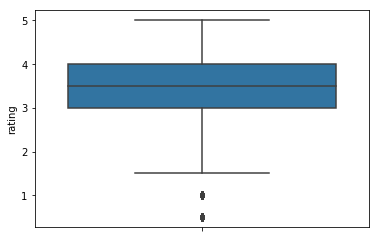

In [10]:
import seaborn as sb
%matplotlib inline  
sb.boxplot(rating['rating'], orient = 'v')

Se procede a generar la tabla con los promedios y número de personas que calificaron la película.

In [11]:
rating_mean = rating.groupby(['movieId'])[['rating']].mean()
rating_total = rating.groupby(['movieId'])[['rating']].count().rename(columns={'rating':'Total_Rating'})

rating = pd.concat([rating_mean, rating_total], axis=1, join='inner')
rating.head()

,rating,Total_Rating
movieId,,
1,3.888157,66008
2,3.236953,26060
3,3.175550,15497
4,2.875713,2981
5,3.079565,15258


In [12]:
rating_mean.shape

(45115, 1)

In [13]:
rating_total.shape

(45115, 1)

In [14]:
rating.shape

(45115, 2)

## Movies_metadata
El archivo movies_metadata contiene información general de las películas. Sin embargo, se encontraron algunos campos en formato json.

In [15]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### Ajuste campos con formato json
Para cada atributo en formato json se tomó la información relevante, obteniendo así el nuevo dataset sin atributos json en donde es relevante.

In [16]:
import json

def getData(j, l):
    try:
        return json.loads(j.replace('\'', '\"').replace('None', '0'))[l]  
    except:
        return ''

def getData2(j, l):
    try:
        return json.loads(j.replace('\'', '\"').replace('None', '0'))[0][l]  
    except:
        return ''

movies['belongs_to_collection'] = movies['belongs_to_collection'].apply(lambda x: getData(x, "name"))
movies['genres'] = movies['genres'].apply(lambda x: getData2(x, "name"))
movies['production_companies'] = movies['production_companies'].apply(lambda x: getData2(x, "name"))
movies['production_countries'] = movies['production_countries'].apply(lambda x: getData2(x, "name"))

movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,Animation,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,,65000000,Adventure,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,Romance,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,,16000000,Comedy,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### Agregando los campos de rating

In [17]:
movies.rename(index=str, columns={"id": "movieId"}, inplace = True)
movies.set_index("movieId").head()

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
movieId,,,,,,,,,,,,,,,,,,,,,
862,False,Toy Story Collection,30000000,Animation,http://toystory.disney.com/toy-story,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
8844,False,,65000000,Adventure,NaN,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
15602,False,Grumpy Old Men Collection,0,Romance,NaN,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
31357,False,,16000000,Comedy,NaN,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
11862,False,Father of the Bride Collection,0,Comedy,NaN,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


#### Limpiando ids que erroneos
Con el fin de poder realizar el cruce se eliminan algunos ids que no permiten realizar es cast a integer para hacer el cruce.

In [18]:
movies.drop(movies[movies['movieId'] == '1997-08-20'].index, inplace = True) 
movies.drop(movies[movies['movieId'] == '2012-09-29'].index, inplace = True)
movies.drop(movies[movies['movieId'] == '2014-01-01'].index, inplace = True)
movies['movieId'] = movies['movieId'].astype(int)
movies.shape

(45463, 24)

#### Verificando el Join entre datasets
Se encontró que no existen ratings para todos los campos del dataset movies. Existen registros para el 16.64 % de los casos, por esta razón no se tendrá en cuenta la información de ratings. En su lugar se utilizarán los campos vote_average y vote_count

In [19]:
movies_rating = movies.merge(rating,left_on = "movieId", right_on="movieId")

## Dataset final

In [20]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,movieId,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,Animation,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,,65000000,Adventure,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,Romance,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,,16000000,Comedy,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [21]:
list(movies.keys())

['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'movieId',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [22]:
# Función búsqueda de vacíos
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

----

# LIMPIEZA Y PERFILAMIENTO 

Se da inicio al análisis de cada una de las variables contenidas en el dataset

## Variable "adult"

In [23]:
movies["adult"].value_counts()

False    45454
True         9
Name: adult, dtype: int64

La variable "adult" claramente no representa valor significativo para el objetivo final de la consturccción del modelo. Esto se ve reflejado en la tendecia de tomar un unico valor. Por tal motivo <b>Se elimina la variable del dataset</b> bajo el criterio <b>baja información representativa (Constante)</b>

## Varaible "belongs_to_collection"

In [24]:
movies["belongs_to_collection"].head()

0              Toy Story Collection
1                                  
2         Grumpy Old Men Collection
3                                  
4    Father of the Bride Collection
Name: belongs_to_collection, dtype: object

Como se pudo evidenciar en los pasos de preparación inicial del dataset, esta variable obtiene información descriptiva de la pelicula, sin embargo, tras el ajuste de las variables en formato JSON contiene información que se ve reflejada directamente desde el dataset original y sin ningun tipo de trasdormación a traves de la variable "original_title".

Por esta razon la varialbe se descarta bajo el criterio de <b>redundancia</b>.

## Variable "Budget"

### Presupuesto

Esta variable representa el resupuesto invertido para el desarrollo de cada película, lo que puede influenciar el rendimiento de esta en terminos de alcance e influenciar en variables como el nivel de aceptación y el exito de la misma.

Es importante mencionar que esta variable puede establecer, junto con la variable relatiba a los ingresos, y posublemente junto a el criterio de un experto; la definición de exito de una pelicula. 

In [25]:
movies["budget"].head()

0    30000000
1    65000000
2           0
3    16000000
4           0
Name: budget, dtype: object

In [26]:
rev_bud = movies[["revenue","budget"]]
missing_values_table(rev_bud)

,Missing Values,% of Total Values
revenue,3,0.006599
budget,0,0.000000


In [27]:
movies = movies[(movies["revenue"].notnull())]

In [28]:
movies.shape

(45460, 24)

In [29]:
movies = movies.astype({"budget":int})
movies["budget"].tail()

45461    0
45462    0
45463    0
45464    0
45465    0
Name: budget, dtype: int64

/Users/juancamilo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/juancamilo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


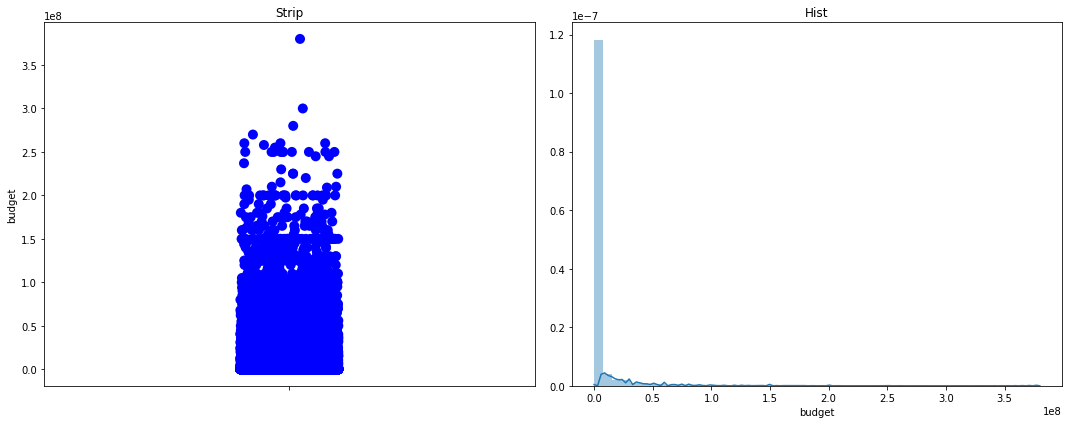

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))

axs[0].set_title("Strip")
sb.stripplot(x="budget", data=movies,size=10, jitter=True, color="blue",orient='v',ax = axs[0])

axs[1].set_title("Hist")
sb.distplot(movies["budget"],ax = axs[1]);

plt.tight_layout()

### Análisis gráfico: Correlación entre el presupuesto y el ingreso

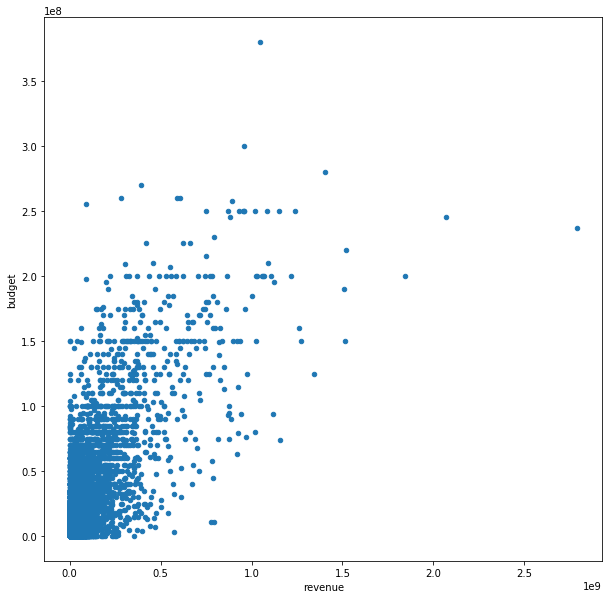

In [31]:
movies.plot(x='revenue',y='budget',kind='scatter',figsize=(10,10))

Se desarrolla un Test De correlación de Pearson

In [32]:
import scipy.stats as stats
stats.pearsonr(movies['revenue'], movies['budget'])

(0.7687758447446283, 0.0)

Presenta Correlación significativa con la variable de ingresos. Lo que puede ser un atributo altamente importante para lograr el objetivo esperado desde el punto de vista del negocio. No se elimina "budget"

## Variable "Genres"

In [33]:
movies["genres"].unique()

array(['Animation', 'Adventure', 'Romance', 'Comedy', 'Action', 'Family',
       'History', 'Drama', 'Crime', 'Fantasy', 'Science Fiction', '',
       'Thriller', 'Music', 'Horror', 'Documentary', 'Mystery', 'Western',
       'TV Movie', 'War', 'Foreign'], dtype=object)

Se detecta una categoria Vacia, sin un nompbre especifico.

In [34]:
print("Total registros\t",movies[movies["genres"]==""].shape[0])
print("Porcentaje   \t {:.3f}%".format((movies[movies["genres"]==""].shape[0]/movies.shape[0])*100))

Total registros	 2442
Porcentaje   	 5.372%


Se decide no eliminar dicha categoria puesto que representa claramente un subconjunto significativo del todal de registros. Adicionalmente, el tratamiento completo de dichos valores (faltantes == '') podrian ser o no un requerimiento en función del algoritmo seleccionado.


##  Variable "original_language"

In [35]:
movies["original_language"].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

Se eliminan aquellos registros sin valores algunos

In [36]:
movies = movies[(movies["original_language"].notnull())]

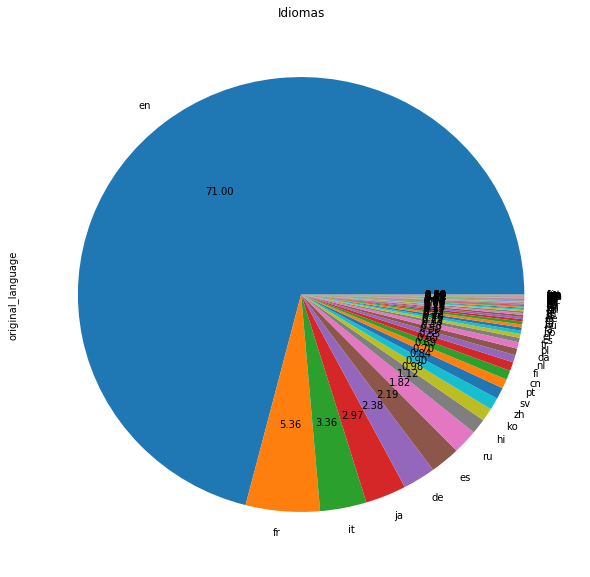

In [37]:
movies["original_language"].value_counts().plot(kind='pie',figsize=(10, 10),title='Idiomas',autopct='%.2f')

Claramente el número de peliculas desarrolladas en el idioma ingles representa la mayor cantidad del conjunto de datos, donde se tiene cerca del 29% para el resto de los idiomas, de esta forma se decide almacenar dicha variable, puesto que aporta información significativa sobre las peliculas.

## Variable "original_title"

A pesar de que dicha variable no aporta información alguna sobre el objetivo final del proyecto, se almacena con el proposito de identificar claramente las peliculas

In [38]:
missing_values_table(movies)

,Missing Values,% of Total Values
adult,0,0.000000
belongs_to_collection,0,0.000000
budget,0,0.000000
genres,0,0.000000
homepage,37671,82.886312
movieId,0,0.000000
imdb_id,17,0.037405
original_language,0,0.000000
original_title,0,0.000000
overview,953,2.096856


## Variable "overview"

In [39]:
movies["overview"].head(3)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
Name: overview, dtype: object

Esta variable no aporta directamente información sobre las peliculas desde la perspectiva planteada, es decir para el objetivo final. Claramente describe el contenido de las peliculas, sin embargo un análisis en profundidad requere del procesamiento del lenguaje natural para su desarrollo. <b> se descarta </b>

##  Variable "popularity"

La popularidad representa una variable imoportante, la cual puede tener reción con otras variables al interior del dataset, para ellos se desarrollará la prueba de correlación de pearson junto con las variables "budget" y "revenue",  con el objetivo de observar si el presupuesto destinado a las peliculas tiene impacto sobre su posuparidad  o si la popularidad esta directamente relaciónada con los ingresos obtenidos

In [40]:
movies["popularity"] = movies["popularity"].astype(float)

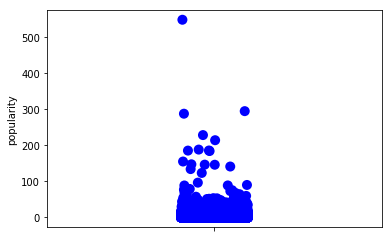

In [41]:
sb.stripplot(x="popularity", data=movies,size=10, jitter=True, color="blue",orient='v')

### Pruebas de Correlación

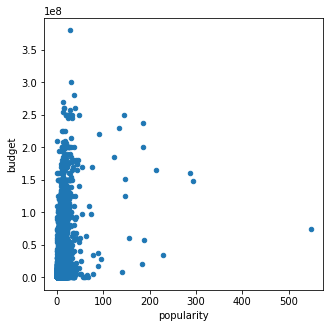

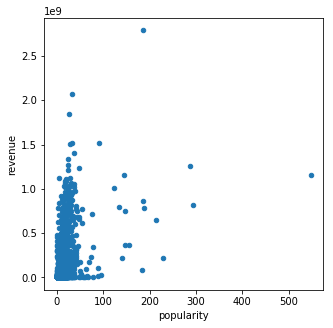

In [42]:
movies.plot(x='popularity',y='budget',kind='scatter',figsize=(5,5))
movies.plot(x='popularity',y='revenue',kind='scatter',figsize=(5,5))

In [43]:
import scipy.stats as stats
stats.pearsonr(movies['popularity'], movies['budget'])


(0.44963360440361144, 0.0)

In [44]:
stats.pearsonr(movies['popularity'], movies['revenue'])

(0.5061743446266574, 0.0)

CLaramente el nivel de correlación no es muy alto para la hipotesis planteada, sin embargo se puede evidenciar influencia en el total del presupuesto hacia la popularidad que desarrollara la pelicula y de igual manera se puede observar influencia de la popularidad en los ingresos adquieridos por las peliculas.

Es claro que la popularidad no presentará correlación directa entre las variables debido a que existen multiples factores que impactan el desempleño de las peliculas y el rendimiento en terminos económicos de estas.

## Variables descartadas hasta este Punto

Las siguentes variables dueron descartadas, debido a que presentan información redundante o no aportan significativamente

* Adult
* belonge_to_collection
* imdb_id
* poster_path 
* homepage

Las variables poster_path y homepage no aporta informacion alguna

La variable imdb_id es un identificador relacionado al dataset de IMDB, sin embargo los datos encontrados allí se encuentran tambien es el presente dataset.

-----

In [45]:
missing_values_table(movies)

,Missing Values,% of Total Values
adult,0,0.000000
belongs_to_collection,0,0.000000
budget,0,0.000000
genres,0,0.000000
homepage,37671,82.886312
movieId,0,0.000000
imdb_id,17,0.037405
original_language,0,0.000000
original_title,0,0.000000
overview,953,2.096856


# Variable release date

Limpieza de valores atípicos 

In [46]:
movies['release_date']=pd.to_datetime(movies['release_date']) 

In [47]:
movies['release_date']= movies['release_date'].fillna(value='1900-01-01')

In [48]:
df_fechasatip = movies[(movies.release_date=='1900-01-01')]

Cálculo de totales de ingresos de los dataset completo y el de valores vacíos

In [49]:
Total_general = movies['revenue'].sum()
Total_atip = df_fechasatip['revenue'].sum()

Cálculo de representatividad de valores vacíos

In [50]:
(Total_atip/Total_general) * 100

1.9624120206189784e-09

Eliminación de valores vacíos

In [51]:
movies = movies[(movies.release_date != '1900-01-01')]

In [52]:
missing_values_table(movies)

,Missing Values,% of Total Values
adult,0,0.000000
belongs_to_collection,0,0.000000
budget,0,0.000000
genres,0,0.000000
homepage,37599,82.881076
movieId,0,0.000000
imdb_id,14,0.030861
original_language,0,0.000000
original_title,0,0.000000
overview,940,2.072082


Generación de variables nuevas a partir de variable tratada

In [53]:
movies['Anio_producion'] = movies['release_date'].dt.year
movies['Mes_produccion'] = movies['release_date'].dt.month

El tratamiento realizado a esta variable despues de evidenciar que existían valores vacíos fue eliminar los 87 registros que correspondian con esta característica. Esta decisión fue tomada despues de realizar la evaluación en terminos de representatividad del valor de ingresos al que correspondian el total de registros vacíos sobre el valor total de ingresos del conjunto de datos, evidenciando que no es un valor representativo el resultado obtenido.

# Variables production companies, production countries, tagline y tittle

In [54]:
movies['production_companies'].head(10)

0                   Pixar Animation Studios
1                          TriStar Pictures
2                              Warner Bros.
3    Twentieth Century Fox Film Corporation
4                     Sandollar Productions
5                       Regency Enterprises
6                        Paramount Pictures
7                      Walt Disney Pictures
8                        Universal Pictures
9                            United Artists
Name: production_companies, dtype: object

In [55]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt
%matplotlib inline

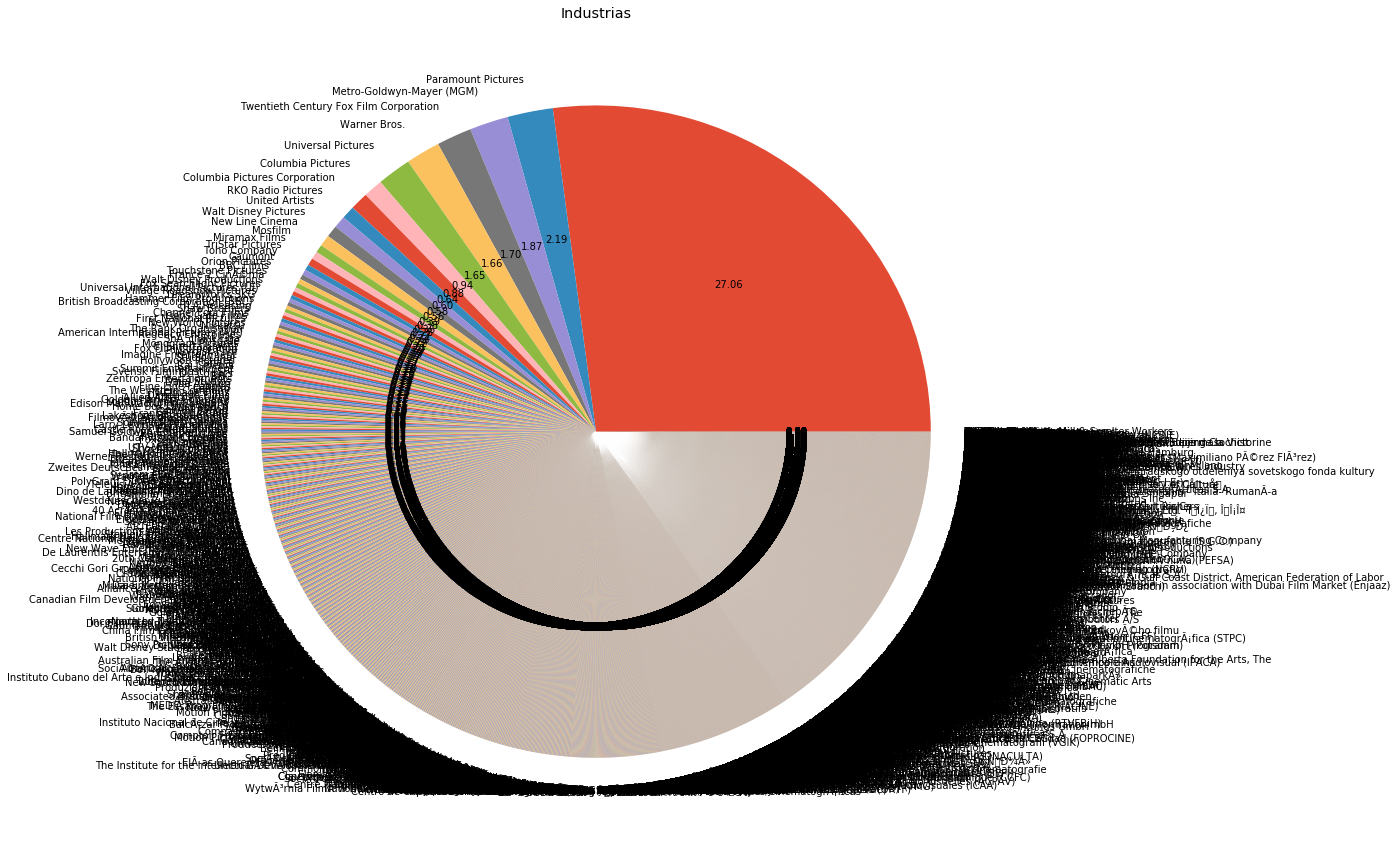

In [56]:
movies.production_companies.value_counts().plot(kind='pie',figsize=(15, 15),title='Industrias',autopct='%.2f')

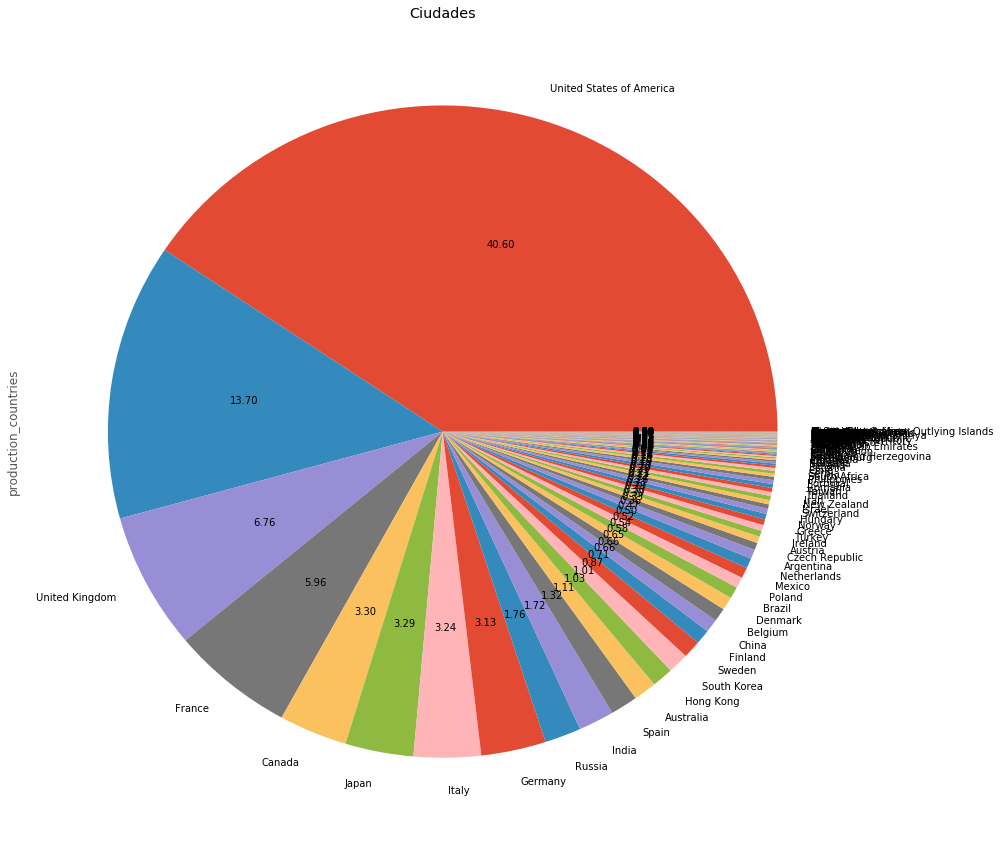

In [57]:
movies.production_countries.value_counts().plot(kind='pie',figsize=(15, 15),title='Ciudades',autopct='%.2f')

In [ ]:
movies.tagline.value_counts().plot(kind='pie',figsize=(4, 4),title='Tag',autopct='%.2f')

In [ ]:
movies.title.value_counts().plot(kind='pie',figsize=(4, 4),title='Tittle',autopct='%.2f')

A partir del análisis descriptivo realizado a las variables observadas se evidencia que contienen un rango amplio de valores, lo cual deberia agruparse de tal manera que se puedan resumir las caracteristicas relevantes, no se considero la alternativa de tratar estas variables dado que no aportan con certeza valor a la predicción y no se cuenta con el criterio experto para definir las agrupaciones correctas. Es por ello que se excluyen dichas variables desde la preparación de los datos.



# Variable Revenue

In [ ]:
movies.revenue.describe()

In [ ]:
sb.stripplot(x="revenue", data=movies,size=10, jitter=True, color="red",orient='v') 

Detección de valores atípicos

In [ ]:
movies[(movies.revenue == movies.revenue.values.max())]

In [ ]:
dfmovies2 = movies[(movies.revenue != movies.revenue.values.max())]

In [ ]:
dfmovies2[(dfmovies2.revenue == dfmovies2.revenue.values.max())]

In [ ]:
dfmovies3 = dfmovies2[(dfmovies2.revenue != dfmovies2.revenue.values.max())]

In [ ]:
dfmovies3[(dfmovies3.revenue == dfmovies3.revenue.values.max())]

A partir del análisis descriptivo de la información, se evidenciaron valores extremos en función a los ingresos, teniendo en cuenta que esta variable es representativa para el modelo a construir se realizó la exploración en detalle de dichos valores extremos, se encontró que estos corresponden a las peliculas: Avatar con ingresos por 2.7 miles de millones de dolares, Titanic con ingresos por 2.1 miles de millones de dolares y Start Wars con ingresos por 2.06 miles de millones de dolares.

Teniendo en cuenta lo anterior, estos valores atípicos se decide no tratarlos (<b>No Elminarlos</b>) dado que se considera que las caracteristicas que estos registros aportarian para el modelo predictivo son de gran utilidad para el cumplimiento de los objetivos de negocio, por la importancia de los datos allí reportados en el contexto tratado.

# Variable Runtime

In [ ]:
movies.runtime.describe()

In [ ]:
sb.stripplot(x="runtime", data=movies,size=10, jitter=True, color="orange",orient='v') 

In [ ]:
def Categoria_TiempoEjecucion(x):
    if (x > 0 and x <= 200):
        return '0-200 Minutos'
    else:
        if (x > 200 and x <= 400):
            return '200-400 Minutos'
        else:    
            if (x > 400 and x <= 800):
                return '400-800 Minutos'
            else:
                if (x > 800 ):
                   return 'Mayor a 800 Minutos'

In [ ]:
movies['Categoria_TiempoEjecucion'] = movies.runtime.apply(Categoria_TiempoEjecucion)

In [ ]:
movies.hist('revenue',by='Categoria_TiempoEjecucion',figsize=(20,15),bins=10) 

Para la variable en observación se realizó una discretización con el fin de realizar agrupaciones que permitan identificar facilmente los datos que para el modelo posiblemente pueden ser de interés. Con el fin de aprovechar la información contenida en esta variable se realizó este procedimiento.

# Variable status 

Dado que el grupo de interés que se buscará son las peliculas que han sido estrenadas y tuvieron exito, se procede a eliminar los estados diferentes de release porque estos pueden aportar ruido a el modelo.

In [ ]:
movies.status.unique()

In [ ]:
movies.groupby('status').revenue.hist(alpha=0.4)# 

In [ ]:
movies.status.value_counts().plot(kind='pie',figsize=(8, 8),title='Estado pelicula',autopct='%.2f')

In [ ]:
movies.shape

In [ ]:
movies = movies[movies.status == 'Released']

In [ ]:
movies.shape

In [ ]:
movies.status.value_counts().plot(kind='pie',figsize=(4, 4),title='Estado pelicula',autopct='%.2f')

A partir del análisis descriptivo realizado a la variable fue posible evidenciar que se encontraban diversas categorias asociadas a la variable, teniendo en cuenta que el objetivo de negocio establecido se encuentra relacionado con el éxito de las peliculas se establece para la predicción que la categoria objetivo es Released. 

Explorando la variable, se encontró que la representatividad de la categoria sobre la muestra es del 99% lo suficientemente significativa para el planteamiento del modelo, es por ello que solo se tendra en cuenta esta categoria.

ESTA VARIABLE SE ELIMINA, YA QUE NO APORTA INFORMACIÓN ALGUNA Y SE CONTEMPLA UNA UNICA CATEGORIA

#  Variable vote average

In [ ]:
movies.vote_average.describe()

In [ ]:
sb.boxplot(movies['vote_average'], orient = 'v')

In [ ]:
def Categoria_Calificacion(x):
    if (x > 0 and x <= 2):
        return 'No aceptada'
    else:
        if (x > 2 and x <= 4):
            return 'Mala'
        else:    
            if (x > 4 and x <= 6):
                return 'Aceptada'
            else:
                if (x > 6 and x <= 8 ):
                    return 'Buena'
                else: 
                    if (x > 8):
                        return 'Exitosa'

In [ ]:
movies['Categoria_CalificacionPelicula'] = movies.vote_average.apply(Categoria_Calificacion)

In [ ]:
movies.Categoria_CalificacionPelicula.value_counts().plot(kind='pie',figsize=(8, 8),title='Calificacion_Pelicula',autopct='%.2f')

En la exploración de esta variable se evidenció que hace referencia a la cualificación que tiene una pelicula, la cual se encuentra en una escala de 1 a 10. Esta variable aporta información de gran utilidad para determinar el acogimiento de una pelicula, es por ello que se realizó una discretización con el fin de agrupar por 5 niveles que definan la calificación proporcionada a una pelicula.

# Variable vote count

In [ ]:
movies.vote_count.describe()

In [ ]:
import scipy.stats  as stats
stats.spearmanr(movies['vote_count'], movies['vote_average'])

In [ ]:
movies.plot(x='vote_count',y='vote_average',kind='scatter',figsize=(10,10))

Posterior al analisis realizado de la variable en observación, se determina que se encuentra correlacionada con la variable que cualifica la pelicula, es por ello que se determina mantener la variable para la construcción del modelo.

In [ ]:
list(movies.keys())

Se determina descartar las siguientes variables:

* spoken_languages porque se encuentra una columna homologa denominada original_language
* video es una variable booleana que se refiere si la pelicula es video o no, dicha variable no aporta valor al modelo en construcción.

#  Variables finales

In [ ]:
movies = movies[[ 'budget', 'genres', 'movieId', 'original_language', 'original_title', 'popularity', 'release_date','revenue','runtime', 'vote_average', 'vote_count', 'Anio_producion', 'Mes_produccion', 'Categoria_TiempoEjecucion', 'Categoria_CalificacionPelicula'  ]]

In [ ]:
movies.head()